In [10]:
# Standard Imports
import numpy as np, pandas as pd, random, json, time, os

# Plotly Imports
import plotly.graph_objects as go
import plotly.express as px

# Dash Imports
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

In [11]:
{'label':'Life sciences', 'value': 'Life sciences'},
       {'label':'Agricultural sciences and natural resources',  'value': 'Agricultural sciences and natural resources'},
       {'label':'Biological and biomedical sciences',  'value': 'Biological and biomedical sciences'},
       {'label': 'Health sciences', 'value': 'Health sciences'},
       {'label':'Physical sciences and earth sciences',  'value': 'Physical sciences and earth sciences'},
       {'label': 'Chemistry', 'value': 'Chemistry'},
       {'label':'Geosciences, atmospheric sciences, and ocean sciences', 'value': 'Geosciences, atmospheric sciences, and ocean sciences'},
       {'label':'Physics and astronomy',  'value': 'Physics and astronomy'},
       {'label': 'Mathematics and computer sciences', 'value': 'Mathematics and computer sciences'},
       {'label':'Computer and information sciences',  'value': 'Computer and information sciences'},
       {'label': 'Mathematics and statistics', 'value': 'Mathematics and statistics'},
       {'label':'Psychology and social sciences',  'value': 'Psychology and social sciences'},
       {'label': 'Psychology', 'value': 'Psychology'},
       {'label': 'Anthropology', 'value': 'Anthropology'},
       {'label':'Economics', 'value': 'Economics'},
       {'label': 'Political science and government',  'value': 'Political science and government'},
       {'label': 'Sociology', 'value': 'Sociology'},
       {'label':'Other social sciences',  'value': 'Other social sciences'},
       {'label': 'Engineering', 'value': 'Engineering'},
       {'label':'Aerospace, aeronautical, and astronautical engineering', 'value': 'Aerospace, aeronautical, and astronautical engineering'},
       {'label':'Bioengineering and biomedical engineering',  'value': 'Bioengineering and biomedical engineering'},
       {'label': 'Chemical engineering', 'value':  'Chemical engineering'},
       {'label':'Civil engineering', 'value': 'Civil engineering'},
       {'label':'Electrical, electronics, and communications engineering', 'value': 'Electrical, electronics, and communications engineering'},
       {'label':'Industrial and manufacturing engineering', 'value': 'Industrial and manufacturing engineering'},
       {'label':'Materials science engineering', 'value': 'Materials science engineering'},
       {'label': 'Mechanical engineering', 'value': 'Mechanical engineering'},
       {'label':'Other engineering',  'value': 'Other engineering'},
       {'label':  'Education',  'value':  'Education'},
       {'label':  'Education administration', 'value':  'Education administration'},
       {'label':'Education research', 'value': 'Education research'},
       {'label': 'Teacher education',  'value': 'Teacher education'},
       {'label': 'Teaching fields', 'value':  'Teaching fields'},
       {'label':'Other education',  'value': 'Other education'},
       {'label': 'Humanities and arts', 'value': 'Humanities and arts'},
       {'label':'Foreign languages and literature', 'value':  'Foreign languages and literature'},
       {'label': 'History',  'value': 'History'},
       {'label': 'Letters', 'value': 'Letters'},
       {'label':'Other humanities and arts', 'value': 'Other humanities and arts'},
       {'label': 'Other', 'value': 'Other'},
       {'label':'Business management and administration', 'value': 'Business management and administration'},
       {'label': 'Communication', 'value': 'Communication'},
       {'label':'Non-science and engineering fields nec',  'value':'Non-science and engineering fields nec'} 

IndentationError: unexpected indent (Temp/ipykernel_5804/154175992.py, line 2)

In [12]:
df = pd.read_csv("CSV/nsf23300-tab001-007.csv",encoding='cp1252', header=0, index_col=0) # skiprows=[], header=0)

bystudy=df
byyear=df.T
majors=bystudy.index
#majors


bystudy

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,% change 2011–21
Field and citizenship status,,,,,,,,,,,,
All doctorate recipientsa,"48,909","50,943","52,703","53,986","54,886","54,809","54,552","55,080","55,609","55,224","52,250",6.8
Life sciences,"11,535","11,964","12,207","12,484","12,493","12,539","12,554","12,754","12,748","12,549","11,814",2.4
Agricultural sciences and natural resources,"1,206","1,255","1,324","1,338","1,434","1,379","1,493","1,442","1,488","1,470","1,334",10.6
Biological and biomedical sciences,"8,152","8,322","8,354","8,868","8,783","8,863","8,566","8,782","8,678","8,410","8,149",0.0
Health sciences,"2,177","2,387","2,529","2,278","2,276","2,297","2,495","2,530","2,582","2,669","2,331",7.1
...,...,...,...,...,...,...,...,...,...,...,...,...
Other humanities and arts,299,324,316,302,309,280,286,307,345,305,310,3.7
Other,786,834,945,905,867,890,940,"1,028","1,106","1,075","1,142",45.3
Business management and administration,477,542,600,589,546,553,588,642,689,658,683,43.2


In [13]:
import re

In [14]:
bystudy

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,% change 2011–21
Field and citizenship status,,,,,,,,,,,,
All doctorate recipientsa,"48,909","50,943","52,703","53,986","54,886","54,809","54,552","55,080","55,609","55,224","52,250",6.8
Life sciences,"11,535","11,964","12,207","12,484","12,493","12,539","12,554","12,754","12,748","12,549","11,814",2.4
Agricultural sciences and natural resources,"1,206","1,255","1,324","1,338","1,434","1,379","1,493","1,442","1,488","1,470","1,334",10.6
Biological and biomedical sciences,"8,152","8,322","8,354","8,868","8,783","8,863","8,566","8,782","8,678","8,410","8,149",0.0
Health sciences,"2,177","2,387","2,529","2,278","2,276","2,297","2,495","2,530","2,582","2,669","2,331",7.1
...,...,...,...,...,...,...,...,...,...,...,...,...
Other humanities and arts,299,324,316,302,309,280,286,307,345,305,310,3.7
Other,786,834,945,905,867,890,940,"1,028","1,106","1,075","1,142",45.3
Business management and administration,477,542,600,589,546,553,588,642,689,658,683,43.2


In [15]:
bystudy.index

Index(['All doctorate recipientsa', 'Life sciences',
       'Agricultural sciences and natural resources',
       'Biological and biomedical sciences', 'Health sciences',
       'Physical sciences and earth sciences', 'Chemistry',
       'Geosciences, atmospheric sciences, and ocean sciences',
       'Physics and astronomy', 'Mathematics and computer sciences',
       ...
       'Other education', 'Humanities and arts',
       'Foreign languages and literature', 'History', 'Letters',
       'Other humanities and arts', 'Other',
       'Business management and administration', 'Communication',
       'Non-science and engineering fields nec'],
      dtype='object', name='Field and citizenship status', length=132)

In [16]:
#### DATA CLEANING #####
for i in range(2011,2022):
   # print(bystudy[str(i)])
    for a in bystudy[str(i)]:
        a=a.replace(",","")
bystudy
#year=bystudy.astype({'2011':'int'})                        

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,% change 2011–21
Field and citizenship status,,,,,,,,,,,,
All doctorate recipientsa,"48,909","50,943","52,703","53,986","54,886","54,809","54,552","55,080","55,609","55,224","52,250",6.8
Life sciences,"11,535","11,964","12,207","12,484","12,493","12,539","12,554","12,754","12,748","12,549","11,814",2.4
Agricultural sciences and natural resources,"1,206","1,255","1,324","1,338","1,434","1,379","1,493","1,442","1,488","1,470","1,334",10.6
Biological and biomedical sciences,"8,152","8,322","8,354","8,868","8,783","8,863","8,566","8,782","8,678","8,410","8,149",0.0
Health sciences,"2,177","2,387","2,529","2,278","2,276","2,297","2,495","2,530","2,582","2,669","2,331",7.1
...,...,...,...,...,...,...,...,...,...,...,...,...
Other humanities and arts,299,324,316,302,309,280,286,307,345,305,310,3.7
Other,786,834,945,905,867,890,940,"1,028","1,106","1,075","1,142",45.3
Business management and administration,477,542,600,589,546,553,588,642,689,658,683,43.2


In [17]:
year=bystudy
for i in range(2011,2022):
    #print(bystudy[str(i)])
    year[str(i)]=bystudy[str(i)].str.replace(",","")


        
        #df['x']=df['x'].str.replace(',','')
for i in range(2011,2022):
    
    year=year.astype({str(i):'float'})  
year
study=year.T
study

Field and citizenship status,All doctorate recipientsa,Life sciences,Agricultural sciences and natural resources,Biological and biomedical sciences,Health sciences,Physical sciences and earth sciences,Chemistry,"Geosciences, atmospheric sciences, and ocean sciences",Physics and astronomy,Mathematics and computer sciences,...,Other education,Humanities and arts,Foreign languages and literature,History,Letters,Other humanities and arts,Other,Business management and administration,Communication,Non-science and engineering fields nec
2011,48909.0,11535.0,1206.0,8152.0,2177.0,5271.0,2432.0,852.0,1987.0,3273.0,...,53.0,767.0,180.0,131.0,157.0,299.0,786.0,477.0,132.0,177.0
2012,50943.0,11964.0,1255.0,8322.0,2387.0,5419.0,2416.0,941.0,2062.0,3496.0,...,31.0,761.0,160.0,136.0,141.0,324.0,834.0,542.0,107.0,185.0
2013,52703.0,12207.0,1324.0,8354.0,2529.0,5584.0,2484.0,989.0,2111.0,3660.0,...,31.0,779.0,179.0,134.0,150.0,316.0,945.0,600.0,133.0,212.0
2014,53986.0,12484.0,1338.0,8868.0,2278.0,5910.0,2673.0,1098.0,2139.0,3862.0,...,36.0,731.0,142.0,147.0,140.0,302.0,905.0,589.0,137.0,179.0
2015,54886.0,12493.0,1434.0,8783.0,2276.0,5916.0,2666.0,1057.0,2193.0,3818.0,...,33.0,713.0,151.0,131.0,122.0,309.0,867.0,546.0,137.0,184.0
2016,54809.0,12539.0,1379.0,8863.0,2297.0,6251.0,2703.0,1227.0,2321.0,3954.0,...,69.0,712.0,164.0,142.0,126.0,280.0,890.0,553.0,160.0,177.0
2017,54552.0,12554.0,1493.0,8566.0,2495.0,6082.0,2699.0,1169.0,2214.0,3842.0,...,42.0,692.0,159.0,125.0,122.0,286.0,940.0,588.0,122.0,230.0
2018,55080.0,12754.0,1442.0,8782.0,2530.0,6330.0,2807.0,1185.0,2338.0,4022.0,...,43.0,739.0,181.0,112.0,139.0,307.0,1028.0,642.0,165.0,221.0
2019,55609.0,12748.0,1488.0,8678.0,2582.0,6579.0,2939.0,1272.0,2368.0,4230.0,...,77.0,826.0,202.0,130.0,149.0,345.0,1106.0,689.0,163.0,254.0
2020,55224.0,12549.0,1470.0,8410.0,2669.0,6241.0,2761.0,1241.0,2239.0,4387.0,...,49.0,742.0,185.0,120.0,132.0,305.0,1075.0,658.0,153.0,264.0


In [18]:
study = study.iloc[:, :44] ######### ONLY DEALS WITH ALL RECIPIENTS ###############

 

In [19]:
study

Field and citizenship status,All doctorate recipientsa,Life sciences,Agricultural sciences and natural resources,Biological and biomedical sciences,Health sciences,Physical sciences and earth sciences,Chemistry,"Geosciences, atmospheric sciences, and ocean sciences",Physics and astronomy,Mathematics and computer sciences,...,Other education,Humanities and arts,Foreign languages and literature,History,Letters,Other humanities and arts,Other,Business management and administration,Communication,Non-science and engineering fields nec
2011,48909.0,11535.0,1206.0,8152.0,2177.0,5271.0,2432.0,852.0,1987.0,3273.0,...,359.0,5225.0,644.0,1065.0,1513.0,2003.0,2683.0,1327.0,650.0,706.0
2012,50943.0,11964.0,1255.0,8322.0,2387.0,5419.0,2416.0,941.0,2062.0,3496.0,...,316.0,5561.0,684.0,1086.0,1638.0,2153.0,2734.0,1404.0,595.0,735.0
2013,52703.0,12207.0,1324.0,8354.0,2529.0,5584.0,2484.0,989.0,2111.0,3660.0,...,330.0,5715.0,701.0,1148.0,1606.0,2260.0,3023.0,1551.0,645.0,827.0
2014,53986.0,12484.0,1338.0,8868.0,2278.0,5910.0,2673.0,1098.0,2139.0,3862.0,...,339.0,5524.0,674.0,1186.0,1551.0,2113.0,3043.0,1584.0,663.0,796.0
2015,54886.0,12493.0,1434.0,8783.0,2276.0,5916.0,2666.0,1057.0,2193.0,3818.0,...,352.0,5594.0,656.0,1146.0,1583.0,2209.0,3019.0,1582.0,667.0,770.0
2016,54809.0,12539.0,1379.0,8863.0,2297.0,6251.0,2703.0,1227.0,2321.0,3954.0,...,648.0,5482.0,599.0,1148.0,1531.0,2204.0,2941.0,1509.0,672.0,760.0
2017,54552.0,12554.0,1493.0,8566.0,2495.0,6082.0,2699.0,1169.0,2214.0,3842.0,...,492.0,5286.0,618.0,1058.0,1462.0,2148.0,3152.0,1565.0,622.0,965.0
2018,55080.0,12754.0,1442.0,8782.0,2530.0,6330.0,2807.0,1185.0,2338.0,4022.0,...,411.0,5139.0,617.0,948.0,1439.0,2135.0,2977.0,1473.0,630.0,874.0
2019,55609.0,12748.0,1488.0,8678.0,2582.0,6579.0,2939.0,1272.0,2368.0,4230.0,...,480.0,5051.0,610.0,912.0,1386.0,2143.0,3027.0,1533.0,543.0,951.0
2020,55224.0,12549.0,1470.0,8410.0,2669.0,6241.0,2761.0,1241.0,2239.0,4387.0,...,457.0,4924.0,564.0,884.0,1389.0,2087.0,3005.0,1468.0,591.0,946.0


In [20]:
study.to_csv("CSV/nsf23300-tab001-007-1.csv")

In [21]:
study2 = pd.read_csv("CSV/nsf23300-tab001-007-1.csv",encoding='cp1252', index_col=0)
study2

,All doctorate recipientsa,Life sciences,Agricultural sciences and natural resources,Biological and biomedical sciences,Health sciences,Physical sciences and earth sciences,Chemistry,"Geosciences, atmospheric sciences, and ocean sciences",Physics and astronomy,Mathematics and computer sciences,...,Other education,Humanities and arts,Foreign languages and literature,History,Letters,Other humanities and arts,Other,Business management and administration,Communication,Non-science and engineering fields nec
2011,48909.0,11535.0,1206.0,8152.0,2177.0,5271.0,2432.0,852.0,1987.0,3273.0,...,359.0,5225.0,644.0,1065.0,1513.0,2003.0,2683.0,1327.0,650.0,706.0
2012,50943.0,11964.0,1255.0,8322.0,2387.0,5419.0,2416.0,941.0,2062.0,3496.0,...,316.0,5561.0,684.0,1086.0,1638.0,2153.0,2734.0,1404.0,595.0,735.0
2013,52703.0,12207.0,1324.0,8354.0,2529.0,5584.0,2484.0,989.0,2111.0,3660.0,...,330.0,5715.0,701.0,1148.0,1606.0,2260.0,3023.0,1551.0,645.0,827.0
2014,53986.0,12484.0,1338.0,8868.0,2278.0,5910.0,2673.0,1098.0,2139.0,3862.0,...,339.0,5524.0,674.0,1186.0,1551.0,2113.0,3043.0,1584.0,663.0,796.0
2015,54886.0,12493.0,1434.0,8783.0,2276.0,5916.0,2666.0,1057.0,2193.0,3818.0,...,352.0,5594.0,656.0,1146.0,1583.0,2209.0,3019.0,1582.0,667.0,770.0
2016,54809.0,12539.0,1379.0,8863.0,2297.0,6251.0,2703.0,1227.0,2321.0,3954.0,...,648.0,5482.0,599.0,1148.0,1531.0,2204.0,2941.0,1509.0,672.0,760.0
2017,54552.0,12554.0,1493.0,8566.0,2495.0,6082.0,2699.0,1169.0,2214.0,3842.0,...,492.0,5286.0,618.0,1058.0,1462.0,2148.0,3152.0,1565.0,622.0,965.0
2018,55080.0,12754.0,1442.0,8782.0,2530.0,6330.0,2807.0,1185.0,2338.0,4022.0,...,411.0,5139.0,617.0,948.0,1439.0,2135.0,2977.0,1473.0,630.0,874.0
2019,55609.0,12748.0,1488.0,8678.0,2582.0,6579.0,2939.0,1272.0,2368.0,4230.0,...,480.0,5051.0,610.0,912.0,1386.0,2143.0,3027.0,1533.0,543.0,951.0
2020,55224.0,12549.0,1470.0,8410.0,2669.0,6241.0,2761.0,1241.0,2239.0,4387.0,...,457.0,4924.0,564.0,884.0,1389.0,2087.0,3005.0,1468.0,591.0,946.0


In [22]:
year=study.T


In [23]:

year

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,% change 2011–21
Field and citizenship status,,,,,,,,,,,,
All doctorate recipientsa,48909.0,50943.0,52703.0,53986.0,54886.0,54809.0,54552.0,55080.0,55609.0,55224.0,52250.0,6.8
Life sciences,11535.0,11964.0,12207.0,12484.0,12493.0,12539.0,12554.0,12754.0,12748.0,12549.0,11814.0,2.4
Agricultural sciences and natural resources,1206.0,1255.0,1324.0,1338.0,1434.0,1379.0,1493.0,1442.0,1488.0,1470.0,1334.0,10.6
Biological and biomedical sciences,8152.0,8322.0,8354.0,8868.0,8783.0,8863.0,8566.0,8782.0,8678.0,8410.0,8149.0,0.0
Health sciences,2177.0,2387.0,2529.0,2278.0,2276.0,2297.0,2495.0,2530.0,2582.0,2669.0,2331.0,7.1
Physical sciences and earth sciences,5271.0,5419.0,5584.0,5910.0,5916.0,6251.0,6082.0,6330.0,6579.0,6241.0,5757.0,9.2
Chemistry,2432.0,2416.0,2484.0,2673.0,2666.0,2703.0,2699.0,2807.0,2939.0,2761.0,2555.0,5.1
"Geosciences, atmospheric sciences, and ocean sciences",852.0,941.0,989.0,1098.0,1057.0,1227.0,1169.0,1185.0,1272.0,1241.0,1064.0,24.9
Physics and astronomy,1987.0,2062.0,2111.0,2139.0,2193.0,2321.0,2214.0,2338.0,2368.0,2239.0,2138.0,7.6


In [24]:
study.T.index

Index(['All doctorate recipientsa', 'Life sciences',
       'Agricultural sciences and natural resources',
       'Biological and biomedical sciences', 'Health sciences',
       'Physical sciences and earth sciences', 'Chemistry',
       'Geosciences, atmospheric sciences, and ocean sciences',
       'Physics and astronomy', 'Mathematics and computer sciences',
       'Computer and information sciences', 'Mathematics and statistics',
       'Psychology and social sciences', 'Psychology', 'Anthropology',
       'Economics', 'Political science and government', 'Sociology',
       'Other social sciences', 'Engineering',
       'Aerospace, aeronautical, and astronautical engineering',
       'Bioengineering and biomedical engineering', 'Chemical engineering',
       'Civil engineering',
       'Electrical, electronics, and communications engineering',
       'Industrial and manufacturing engineering',
       'Materials science engineering', 'Mechanical engineering',
       'Other engineeri

In [25]:
study

Field and citizenship status,All doctorate recipientsa,Life sciences,Agricultural sciences and natural resources,Biological and biomedical sciences,Health sciences,Physical sciences and earth sciences,Chemistry,"Geosciences, atmospheric sciences, and ocean sciences",Physics and astronomy,Mathematics and computer sciences,...,Other education,Humanities and arts,Foreign languages and literature,History,Letters,Other humanities and arts,Other,Business management and administration,Communication,Non-science and engineering fields nec
2011,48909.0,11535.0,1206.0,8152.0,2177.0,5271.0,2432.0,852.0,1987.0,3273.0,...,359.0,5225.0,644.0,1065.0,1513.0,2003.0,2683.0,1327.0,650.0,706.0
2012,50943.0,11964.0,1255.0,8322.0,2387.0,5419.0,2416.0,941.0,2062.0,3496.0,...,316.0,5561.0,684.0,1086.0,1638.0,2153.0,2734.0,1404.0,595.0,735.0
2013,52703.0,12207.0,1324.0,8354.0,2529.0,5584.0,2484.0,989.0,2111.0,3660.0,...,330.0,5715.0,701.0,1148.0,1606.0,2260.0,3023.0,1551.0,645.0,827.0
2014,53986.0,12484.0,1338.0,8868.0,2278.0,5910.0,2673.0,1098.0,2139.0,3862.0,...,339.0,5524.0,674.0,1186.0,1551.0,2113.0,3043.0,1584.0,663.0,796.0
2015,54886.0,12493.0,1434.0,8783.0,2276.0,5916.0,2666.0,1057.0,2193.0,3818.0,...,352.0,5594.0,656.0,1146.0,1583.0,2209.0,3019.0,1582.0,667.0,770.0
2016,54809.0,12539.0,1379.0,8863.0,2297.0,6251.0,2703.0,1227.0,2321.0,3954.0,...,648.0,5482.0,599.0,1148.0,1531.0,2204.0,2941.0,1509.0,672.0,760.0
2017,54552.0,12554.0,1493.0,8566.0,2495.0,6082.0,2699.0,1169.0,2214.0,3842.0,...,492.0,5286.0,618.0,1058.0,1462.0,2148.0,3152.0,1565.0,622.0,965.0
2018,55080.0,12754.0,1442.0,8782.0,2530.0,6330.0,2807.0,1185.0,2338.0,4022.0,...,411.0,5139.0,617.0,948.0,1439.0,2135.0,2977.0,1473.0,630.0,874.0
2019,55609.0,12748.0,1488.0,8678.0,2582.0,6579.0,2939.0,1272.0,2368.0,4230.0,...,480.0,5051.0,610.0,912.0,1386.0,2143.0,3027.0,1533.0,543.0,951.0
2020,55224.0,12549.0,1470.0,8410.0,2669.0,6241.0,2761.0,1241.0,2239.0,4387.0,...,457.0,4924.0,564.0,884.0,1389.0,2087.0,3005.0,1468.0,591.0,946.0


2011                3273.0
2012                3496.0
2013                3660.0
2014                3862.0
2015                3818.0
2016                3954.0
2017                3842.0
2018                4022.0
2019                4230.0
2020                4387.0
2021                4373.0
% change 2011–21      33.6
Name: Mathematics and computer sciences, dtype: float64


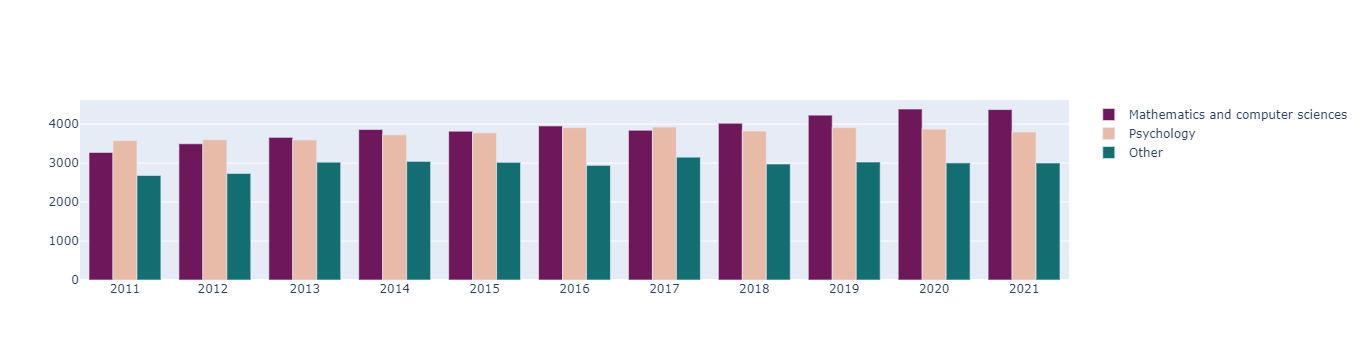

In [30]:

x='Mathematics and computer sciences'
y='Psychology'
z='Other'


branches = ['2011', '2012 ', '2013', '2014','2015','2016','2017','2018','2019','2020','2021']
firstbar = study[x]  #MUST BE DYNAMIC, USED THE Number
secondbar = study[y]  #MUST BE DYNAMIC
thirdbar = study[z]   # MUST be DYNAMIC
print(firstbar)
#TRACES must be processed as a list so it deals with all elements in the list rather than give a number
trace1 = go.Bar(
    x = branches,

    y = firstbar,

    name = str(x), marker_color='#6f175b' ## MUST be DYNAMIC, but dependent on the input in a slightly different way perhaps? (comes from column header..?)

)
trace2 = go.Bar(
    x = branches,

    y = secondbar,

    name = str(y),marker_color='#e8baa8'

)
trace3 = go.Bar(
    x = branches,

    y = thirdbar,

    name = str(z), marker_color='#136e72'

)
data = [trace1, trace2, trace3]
layout = go.Layout(barmode = 'group')
fig = go.Figure(data = data, layout = layout)
fig.show()


In [7]:
# Standard Imports
import numpy as np, pandas as pd, random, json, time, os

# Plotly Imports
import plotly.graph_objects as go
import plotly.express as px

# Dash Imports
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

# Additional Imports
# import STUFF

df710 = pd.read_csv("CSV/nsf23300-tab007-010.csv",encoding='cp1252')

# Load CSS sheet for style information
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

# Define the Web-App Object and set to variable "server"
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server

# Suppres some output
app.config.suppress_callback_exceptions = True


#################################################
################# Layout ########################
#################################################

app.layout = html.Div([
    #h1 = level 1 header, etc...#
    html.H1(children='Graduate Student Data 1970-2021'),
    html.H2(children='This dashboard helps visualize location and statistics based data of doctorate recipients'),
    
    html.H6("Change below to make a new figure:"),
    
    html.Div([
           "Selection:",
           dcc.Dropdown(['All fields','Agricultural sciences and natural resources','Biological and biomedical sciences','Computer and information sciences','Engineering','Geosciences, atmospheric, and ocean sciences','Health sciences','Mathematics and statistics','Multidisciplinary/ interdisciplinary sciences','Physical sciences','Psychology','Social sciences','Business','Education','Humanities','Visual and performing arts','Other'], 'All fields', id = 'my-input')
    ]),

    html.Div([
		"State",
		dcc.Dropdown(['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming'], 'Iowa',id = 'my-input2')
	]),
    
    
    html.Br(),
    
    
    html.Div([
        html.Div([
            dcc.Graph(id='figure-output')], 
            style={'width': '49%', 'display': 'inline-block', 'vertical-align': 'middle'}),

        html.Div([dcc.Graph(id='figure-output2')], 
            style={'width': '49%', 'display': 'inline-block', 'vertical-align': 'middle'})
    ]),

])

#####################
# Plot one          #
#####################
@app.callback(
    Output('figure-output', 'figure'),
    Input('my-input', 'value'))    
def make_plot(pltcolor):
    fig = go.Figure()
    hi = df710[pltcolor].max()
    low = df710[pltcolor].min()
    fig = px.choropleth(df710,
                    locations = 'Abbrev',
                    locationmode = 'USA-states',
                    scope = 'usa',
                    color = pltcolor,
                    hover_name = 'State or location',
                    #hover_data = ['Male','Female'],
                    range_color = [low,hi],
                    color_continuous_scale = 'armyrose')  
                    
    #fig.update_layout(title="Model Output")

    
    return fig  
    




#####################
# Plot two          #
#####################
@app.callback(
    Output('figure-output2', 'figure'),
    #Input('my-input', 'value'),
    Input('my-input2', 'value'))    
def make_plot(state):
    fig = px.pie(df7103, 'State or location', state, color_discrete_sequence=px.colors.diverging.Armyrose)
                    
    #fig.update_layout(title="Model Output")
    
    return fig    




    
# -------------------------- MAIN ---------------------------- #


# This is the code that gets run when we call this file from the terminal
# The port number can be changed to fit your particular needs
if __name__ == '__main__':
    app.run_server(host='localhost', port=8080, debug=True, use_reloader=False)


Dash is running on http://localhost:8080/

 * Serving Flask app '__main__'
 * Debug mode: on


In [ ]:
df = pd.read_csv("CSV/nsf23300-tab007-006.csv",encoding='cp1252')
df['Total Rank'] = df['Total'].rank()
df['Tot Sci Eng Rank'] = df['Tot Sci Eng'].rank()
df['Male Sci Eng Rank'] = df['Male Sci Eng'].rank()
df['Female Sci Eng Rank'] = df['Female Sci Eng'].rank()
df['Tot Non Sci Rank'] = df['Tot Non Sci'].rank()
df['Male Non Sci Rank'] = df['Male Non Sci'].rank()
df['Female Non Sci Rank'] = df['Female Non Sci'].rank()
df['Ratio M/F'] = df['Male']/df['Female']
df['Ratio Sci/Non'] = df['Tot Sci Eng']/df['Tot Non Sci']
df[:3]

In [17]:
df710 = pd.read_csv("CSV/nsf23300-tab007-010.csv",encoding='cp1252')
df710


,State or location,Abbrev,All fields,Agricultural sciences and natural resources,Biological and biomedical sciences,Computer and information sciences,Engineering,"Geosciences, atmospheric, and ocean sciences",Health sciences,Mathematics and statistics,Multidisciplinary/ interdisciplinary sciences,Physical sciences,Psychology,Social sciences,Business,Education,Humanities,Visual and performing arts,Other
0,Alabama,AL,640.0,25.0,119.0,11.0,117.0,8.0,30.0,22.0,16.0,45.0,57.0,17.0,24.0,105.0,14.0,1.0,29.0
1,Alaska,AK,42.0,5.0,3.0,0.0,2.0,11.0,0.0,0.0,2.0,2.0,10.0,4.0,0.0,2.0,0.0,0.0,1.0
2,Arizona,AZ,935.0,21.0,112.0,31.0,198.0,23.0,41.0,25.0,35.0,86.0,58.0,104.0,25.0,61.0,43.0,40.0,32.0
3,Arkansas,AR,275.0,21.0,49.0,18.0,48.0,2.0,8.0,2.0,3.0,20.0,11.0,16.0,14.0,40.0,12.0,0.0,11.0
4,California,CA,5892.0,81.0,979.0,285.0,1082.0,146.0,177.0,236.0,191.0,668.0,486.0,628.0,126.0,192.0,333.0,120.0,162.0
5,Colorado,CO,1024.0,23.0,166.0,39.0,217.0,56.0,46.0,46.0,13.0,107.0,59.0,56.0,7.0,92.0,33.0,32.0,32.0
6,Connecticut,CT,731.0,13.0,154.0,22.0,88.0,14.0,20.0,36.0,12.0,97.0,45.0,102.0,22.0,12.0,54.0,15.0,25.0
7,Delaware,DE,212.0,12.0,35.0,9.0,55.0,4.0,2.0,9.0,3.0,28.0,7.0,21.0,2.0,9.0,7.0,2.0,7.0
8,Florida,FL,2339.0,66.0,305.0,139.0,408.0,67.0,137.0,69.0,81.0,185.0,169.0,158.0,58.0,218.0,105.0,47.0,127.0
9,Georgia,GA,1451.0,50.0,286.0,94.0,360.0,17.0,58.0,35.0,36.0,107.0,71.0,103.0,37.0,67.0,63.0,10.0,57.0


In [133]:
df7102.dtypes

State or location    object
Alabama              object
Alaska               object
Arizona              object
Arkansas             object
California           object
Colorado             object
Connecticut          object
Delaware             object
Florida              object
Georgia              object
Hawaii               object
Idaho                object
Illinois             object
Indiana              object
Iowa                 object
Kansas               object
Kentucky             object
Louisiana            object
Maine                object
Maryland             object
Massachusetts        object
Michigan             object
Minnesota            object
Mississippi          object
Missouri             object
Montana              object
Nebraska             object
Nevada               object
New Hampshire        object
New Jersey           object
New Mexico           object
New York             object
North Carolina       object
North Dakota         object
Ohio                

42.0 5892.0


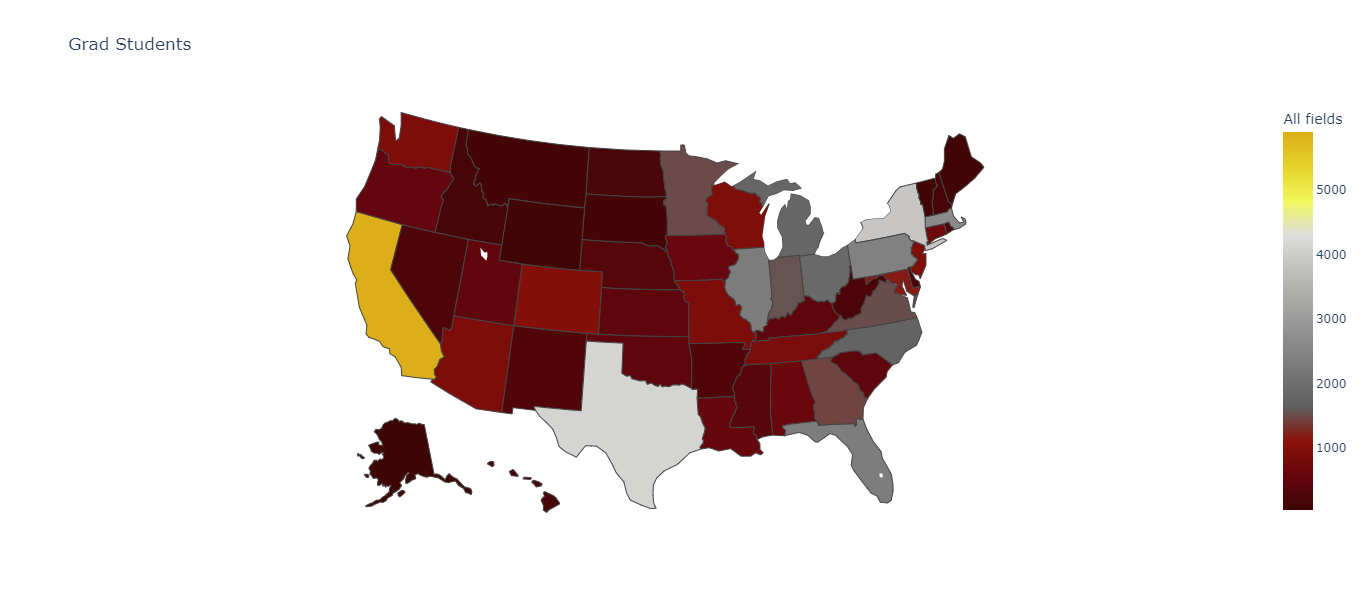

In [121]:

pltcolor = 'All fields'
hi = df710[pltcolor].max()
low = df710[pltcolor].min()
print(low,hi)

fig = px.choropleth(df710,
                    locations = 'Abbrev',
                    locationmode = 'USA-states',
                    scope = 'usa',
                    color = pltcolor,
                    hover_name = 'State or location',
                    #hover_data = ['Male','Female'],
                    range_color = [low,hi],
                    color_continuous_scale = 'oxy',
                    width = 600,
                    height = 600,
                    title = 'Grad Students')
fig.show()

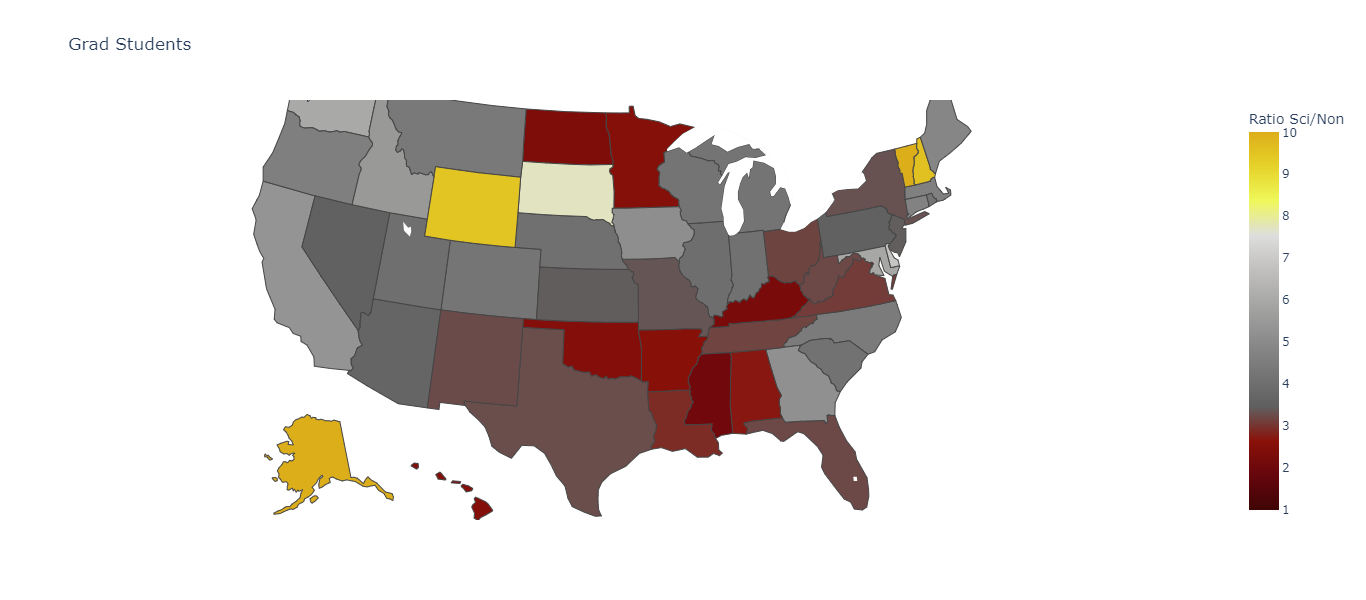

In [103]:
fig2 = px.choropleth(df,
                    locations = 'Abbrev',
                    locationmode = 'USA-states',
                    scope = 'usa',
                    color = 'Ratio Sci/Non',
                    hover_name = 'State or location',
                    hover_data = ['Male','Female'],
                    range_color = [1,10],
                    color_continuous_scale = 'oxy',
                    width = 600,
                    height = 600,
                    title = 'Grad Students')
fig2.show()

In [156]:
df7103 = pd.read_csv("CSV/nsf23300-tab007-010-3.csv",encoding='cp1252')
df7103.drop([0])
df7103

,State or location,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Agricultural sciences and natural resources,3.91,0.78,3.28,3.28,12.66,3.59,2.03,1.88,10.31,...,2.66,3.75,13.59,1.88,1.25,6.25,4.69,0.94,4.38,0.78
1,Biological and biomedical sciences,18.59,0.47,17.50,7.66,152.97,25.94,24.06,5.47,47.66,...,2.34,25.63,94.53,11.56,3.28,27.03,25.63,4.69,26.25,2.66
2,Computer and information sciences,1.72,0.00,4.84,2.81,44.53,6.09,3.44,1.41,21.72,...,0.78,3.28,23.59,3.44,0.47,12.19,5.94,0.47,3.28,0.16
3,Engineering,18.28,0.31,30.94,7.50,169.06,33.91,13.75,8.59,63.75,...,2.66,23.59,143.44,17.50,1.41,48.59,23.91,6.25,20.78,4.06
4,"Geosciences, atmospheric, and ocean sciences",1.25,1.72,3.59,0.31,22.81,8.75,2.19,0.63,10.47,...,0.78,0.94,17.34,2.19,0.00,4.53,5.31,0.47,1.41,1.25
5,Health sciences,4.69,0.00,6.41,1.25,27.66,7.19,3.13,0.31,21.41,...,1.88,6.56,33.44,4.84,0.00,11.41,9.06,2.19,10.31,0.00
6,Mathematics and statistics,3.44,0.00,3.91,0.31,36.88,7.19,5.63,1.41,10.78,...,0.16,3.13,24.69,3.44,0.16,6.41,7.34,0.47,8.13,0.31
7,Multidisciplinary/ interdisciplinary sciences,2.50,0.31,5.47,0.47,29.84,2.03,1.88,0.47,12.66,...,1.25,4.84,14.06,1.09,0.16,7.19,5.78,0.16,1.72,0.16
8,Physical sciences,7.03,0.31,13.44,3.13,104.38,16.72,15.16,4.38,28.91,...,2.03,10.78,48.75,6.88,1.25,18.13,15.00,3.44,16.88,1.41
9,Psychology,8.91,1.56,9.06,1.72,75.94,9.22,7.03,1.09,26.41,...,1.09,10.94,39.22,6.88,1.09,16.88,7.81,3.59,9.84,0.78


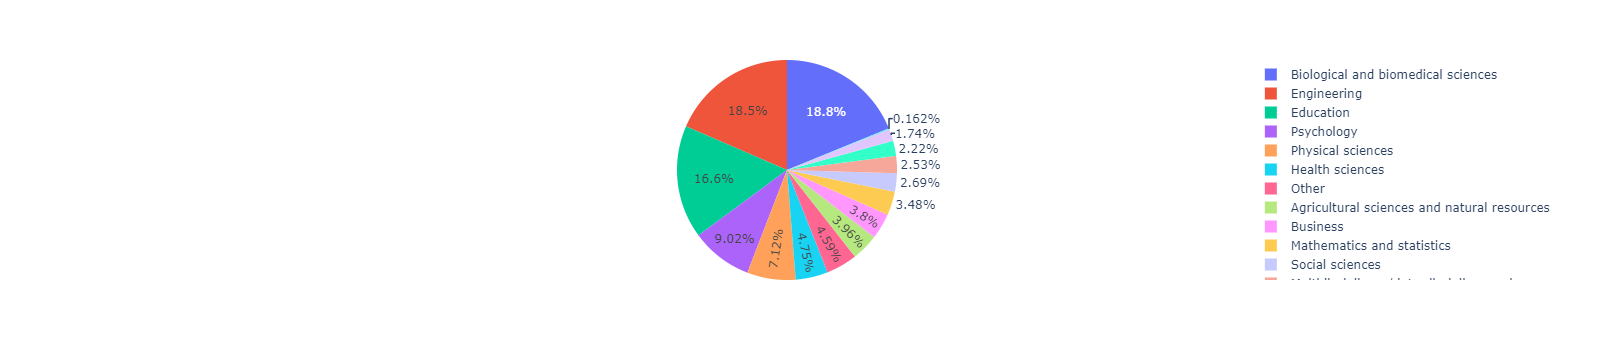

In [150]:
fig3 = px.pie(df7103, 'State or location', 'Alabama')
fig3.show()